In [2]:
##-----Library Imports------##
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime

In [3]:
##--Set parameters for dataset--##
remove_outliers =0

In [4]:
##-----STEP ONE: Import Data-----##

data_path = "./Data/2019/December/listings_complete.csv"
df = pd.read_csv(data_path)

pd.set_option('display.max_columns', None)

print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20191228152823,2019-12-28,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",NaN,NaN,https://a0.muscache.com/im/pictures/697022/385...,NaN,3754,https://www.airbnb.com/users/show/3754,Brigitte,2008-10-21,"Cape Town, Western Cape, South Africa",I'm single and love to travel and meeting peop...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3754/profile_...,https://a0.muscache.com/im/users/3754/profile_...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Southern Suburbs, Western Cape, South Africa",NaN,Ward 57,NaN,Southern Suburbs,Western Cape,7700,Cape Town,"Southern Suburbs, South Africa",ZA,South Africa,-33.94739,18.47600,t,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$661.00,"$4,221.00","$16,884.00",NaN,$211.00,2,$0.00,3,730,3,3,730,730,3.0,730.0,3 weeks ago,t,2,20,50,319,2019-12-28,49,7,2013-05-31,2019-12-15,97.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,0.61
1,13044,https://www.airbnb.com/rooms/13044,20191228152823,2019-12-29,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,NaN,NaN,https://a0.muscache.com/im/pictures/1a1dd4ee-4...,NaN,50700,https://www.airbnb.com/users/show/50700,Barry & Mina,2009-11-02,"Cape Town, Western Cape, South Africa",We have been running multi Award Winning Jambo...,within an

In [265]:
##----STEP TWO: Format Data----##

#a) Drop invalid rows for target
#Price is our results variable therefore drop any entries that don't have a price
#simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
df.drop(df.index[5], inplace = True) #invalid row - price is way too high
# reset index, because we dropped rows
df.reset_index(drop=True, inplace=True)


# b) Replace "?" with NaN
df.replace("?", np.nan, inplace = True)
df.replace(".", np.nan, inplace = True)


# c) Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

id
False    24457
Name: id, dtype: int64

listing_url
False    24457
Name: listing_url, dtype: int64

scrape_id
False    24457
Name: scrape_id, dtype: int64

last_scraped
False    24457
Name: last_scraped, dtype: int64

name
False    24456
True         1
Name: name, dtype: int64

summary
False    23681
True       776
Name: summary, dtype: int64

space
False    17702
True      6755
Name: space, dtype: int64

description
False    24001
True       456
Name: description, dtype: int64

experiences_offered
False    24457
Name: experiences_offered, dtype: int64

neighborhood_overview
False    16644
True      7813
Name: neighborhood_overview, dtype: int64

notes
True     13612
False    10845
Name: notes, dtype: int64

transit
False    15871
True      8586
Name: transit, dtype: int64

access
False    14167
True     10290
Name: access, dtype: int64

interaction
False    15202
True      9255
Name: interaction, dtype: int64

house_rules
False    12300
True     12157
Name: house_rules, dtype: int64

In [266]:
##----Correct Data Formats and Types----##

#change formatting of monetary amounts
df["price"] = df["price"].str.replace('$', '')
df["price"] = df["price"].str.replace(',', '')
df["cleaning_fee"] = df["cleaning_fee"].str.replace('$', '')
df["cleaning_fee"] = df["cleaning_fee"].str.replace(',', '')
df["security_deposit"] = df["security_deposit"].str.replace('$', '')
df["security_deposit"] = df["security_deposit"].str.replace(',', '')
df["extra_people"] = df["extra_people"].str.replace('$', '')
df["extra_people"] = df["extra_people"].str.replace(',', '')
df["host_response_rate"] = df["host_response_rate"].str.replace('%', '')
df['zipcode'] = df['zipcode'].str.replace('Po Box', '')
df['zipcode'] = df['zipcode'].str.replace('Green Point', '')
df[["id", "host_id"]] = df[["id", "host_id"]].astype("object") #we do not want an average of IDs
df[["price", "cleaning_fee", "security_deposit", "extra_people", "host_response_rate"]] = df[["price", "cleaning_fee", "security_deposit", "extra_people", "host_response_rate"]].astype("float") #change from string to float



In [267]:
##----Process Binary Features----##

#change binary t/f columns to 0 and 1
columns =  ['has_availability', 'host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification', 'is_business_travel_ready']
for c in columns:
    df[c] = df[c].replace('f',0,regex=True)
    df[c] = df[c].replace('t',1,regex=True)

In [268]:
##----Remove Features exceeding Threshold of Missing Values----##

#Determine which features have missing values exceeding threshold (>50% missing)
above_thresh = [] #need to remove feature
below_thresh = [] #use imputations
missing = []
for column in missing_data.columns.values.tolist():
    missing_data_counts = missing_data[column].value_counts()
    if(len(missing_data_counts) > 1):
        missing.append(column)
        if((missing_data_counts[1]/(missing_data_counts[0]+missing_data_counts[1])) > 0.5): 
            above_thresh.append(column)
        else:
            below_thresh.append(column)
    else:
        below_thresh.append(column)  
print("Above", above_thresh)
print("")
print("Below", below_thresh)
print("")
print("Missing", missing)

Above ['notes', 'host_neighbourhood', 'square_feet', 'weekly_price', 'monthly_price', 'license']

Below ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type'

In [269]:
##--Drop columns with too many missing values--##
uncorr_columns = ['host_neighbourhood', 'square_feet', 'weekly_price', 'monthly_price', 'license']
df = df.drop(uncorr_columns, axis=1)

In [270]:
##----Imputation----##

#For features below threshold
#Separate into continuous, discrete and categorical
cont = ['security_deposit', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
discrete = ['bathrooms', 'bedrooms', 'beds', 'host_listings_count', 'host_total_listings_count']
category = ['host_response_time', 'zipcode', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
cont = list(cont) 
discrete = list(discrete)
category = list(category)

#Replace continuous numerical variables with mean
for column in cont:
    avg = df[column].astype("float").mean(axis=0) 
    df[column] = df[column].replace(np.nan, avg)

#Replace discrete numerical variables with median
for column in discrete:
    med = df[column].astype("float").median(axis=0) 
    df[column] = df[column].replace(np.nan, med)

#Replace discrete categorical variables with mode
for column in category:
    mode = df[column].mode() 
    df[column] = df[column].replace(np.nan, mode[0])
    


In [272]:
##--Handling Outliers--##

#1. Std. dev.
avg_price = df['price'].astype("float").mean(axis=0) 
std_dev = df['price'].astype("float").std(axis= 0)
outliers = []
remainder_std = []
threshold = avg_price + 4*std_dev #originally 3 std dev
print("Threshold for Outliers: R",threshold)
for entry in df["price"]:
    if(entry > threshold):
        outliers.append(entry)
    else:
        remainder_std.append(entry)
print("Number of outliers: ", len(outliers)) 

Threshold for Outliers: R 29925.8169852753
Number of outliers:  150


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Price')]

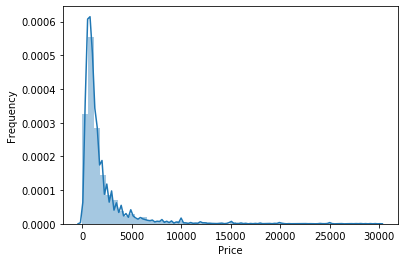

In [273]:
sns_plot=sns.distplot(remainder_std);
sns_plot.set(xlabel = "Price", ylabel = "Frequency")

In [274]:
#2. 99th percentile
percentile_price = df['price'].quantile(.99)
print("Threshold for Outliers: R",percentile_price)
outliers_percentile = []
remainder = []
for entry in df["price"]:
    if(entry > percentile_price):
        outliers_percentile.append(entry)
    else:
        remainder.append(entry)
print("Number of outliers: ", len(outliers_percentile)) 

Threshold for Outliers: R 21628.799999999614
Number of outliers:  245


In [275]:
##----Remove/Retain Outliers----##

df = df.loc[~(df['price'] == 0)] #Remove rows with price value of zero (target)

#If remove_outliers is set at top of notebook
if(remove_outliers):
    df = df.loc[(df['price'] < percentile_price)] #remove outliers according to 99th percentile

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Price')]

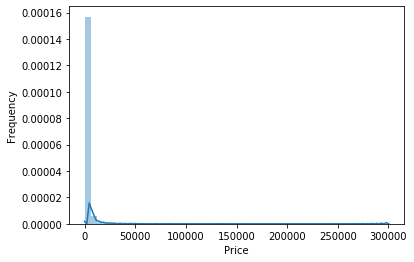

In [276]:
##----Plot Distribution of Target Price Data----##

sns_plot=sns.distplot(df["price"]);
sns_plot.set(xlabel = "Price", ylabel = "Frequency")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Log Price')]

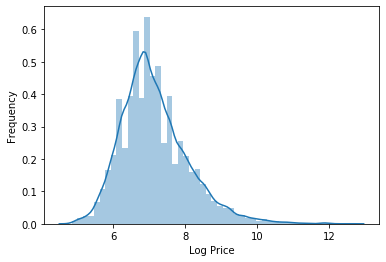

In [277]:
##----STEP THREE: Reducing Skewness----##

#Log Transform
df["log_price"] = np.log(df["price"])
sns_plot=sns.distplot(df["log_price"]);
sns_plot.set(xlabel = "Log Price", ylabel = "Frequency")

In [278]:
sns_plot.figure.savefig("log_dist.png", dpi=200) #save plot

((array([-4.02616583, -3.81241691, -3.69555592, ...,  3.69555592,
          3.81241691,  4.02616583]),
  array([ 4.83628191,  4.83628191,  4.84418709, ..., 12.4291882 ,
         12.51721609, 12.61153109])),
 (0.9201770991795508, 7.1415246728328405, 0.9803056901391629))

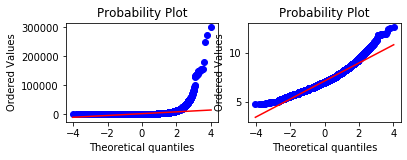

In [279]:
##----Probability Plot----##
ax1 =  pyplot.subplot(221)
stats.probplot(df["price"], dist=stats.norm, plot=ax1)
ax2 =  pyplot.subplot(222)
stats.probplot(df["log_price"], dist=stats.norm, plot=ax2)

-0.2741296911628269


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'BoxCox Price')]

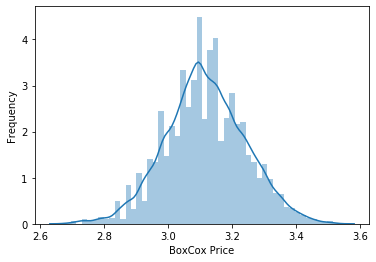

In [280]:
##----BoxCox Transform----##
boxcox_price, val =  stats.boxcox(df["price"])
print(val)
sns_plot = sns.distplot(boxcox_price);
sns_plot.set(xlabel = "BoxCox Price", ylabel = "Frequency")

In [281]:
sns_plot.figure.savefig("boxcox_dist.png", dpi=200) #save plot

((array([-4.02616583, -3.81241691, -3.69555592, ...,  3.69555592,
          3.81241691,  4.02616583]),
  array([2.67902838, 2.67902838, 2.68112571, ..., 3.52704031, 3.52992207,
         3.53293346])),
 (0.1254367369408334, 3.1167629989927503, 0.9993421779400101))

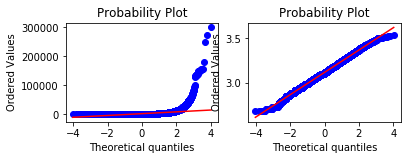

In [282]:
##----Probability Plot----##
ax1 =  pyplot.subplot(221)
stats.probplot(df["price"], dist=stats.norm, plot=ax1)
ax2 =  pyplot.subplot(222)
stats.probplot(boxcox_price, dist=stats.norm, plot=ax2)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Sqrt Price')]

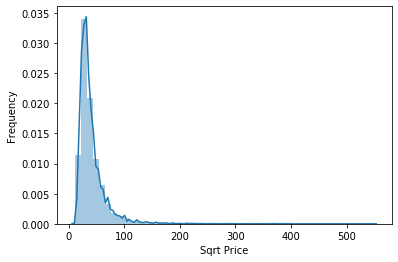

In [283]:
##----Square Root Transform----##
#weakest transform
sqrt_price =  np.sqrt(df["price"])
sns_plot = sns.distplot(sqrt_price);
sns_plot.set(xlabel = "Sqrt Price", ylabel = "Frequency")

In [284]:
sns_plot.figure.savefig("sqrt_dist.png", dpi=200) #save plot

((array([-4.02616583, -3.81241691, -3.69555592, ...,  3.69555592,
          3.81241691,  4.02616583]),
  array([ 11.22497216,  11.22497216,  11.26942767, ..., 499.99299995,
         522.49114825, 547.72073176])),
 (21.803993209296696, 40.448312973172605, 0.7996109161794517))

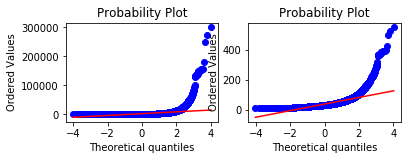

In [285]:
##----Probability Plot----##
ax1 =  pyplot.subplot(221)
stats.probplot(df["price"], dist=stats.norm, plot=ax1)
ax2 =  pyplot.subplot(222)
stats.probplot(sqrt_price, dist=stats.norm, plot=ax2)

In [286]:
##----STEP FOUR: Binning----##

# Bin into four categories
df["host_response_rate"] = pd.cut(df["host_response_rate"], bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df["host_response_rate"] = df["host_response_rate"].astype('str')

# Replace nulls with 'unknown'
df["host_response_rate"].replace('nan', 'unknown', inplace=True)

# Category counts
df["host_response_rate"].value_counts()

100%       14807
unknown     5400
50-89%      2179
0-49%       1087
90-99%       979
Name: host_response_rate, dtype: int64

In [287]:
##----One Hot Encoding----##
dummy_variable_1=pd.get_dummies(df["host_response_rate"])
df = pd.concat([df, dummy_variable_1], axis=1)

In [288]:
df = df.rename(index=str, columns={"calculated_host_listings_count_private_rooms": "host_count_private", "calculated_host_listings_count_entire_homes":"host_count_entire"})

In [289]:
##----Drop unhelpful columns----##
uncorr_columns = ['listing_url', 'scrape_id', 'last_scraped', 'host_total_listings_count', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'calendar_last_scraped', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'calendar_updated', 'host_acceptance_rate', 'first_review', 'last_review', 'jurisdiction_names']
df = df.drop(uncorr_columns, axis=1)

In [290]:
df.to_csv("1-Cleaned Data.csv", index=False) #save cleaned data